# Finding Maximum in data

This tutorial show how to find the maximum over the `latitude` dimension in some files via the compute api

You need to get your API key from [here](https://aims2.llnl.gov/user/profile) and possibly authenticated via my_proxy_client or OAuth2 if the files you're trying to use require it.

In [ ]:
import os
import cwt

wps_url = os.environ.get('WPS_URL', 'https://aims2.llnl.gov/wps')
verify = bool(os.environ.get('WPS_VERIFY', True))
compute_token = os.environ.get('WPS_TOKEN', '<token>')

client = cwt.WPSClient(wps_url, compute_token=compute_token, verify=verify)
client

In [2]:
# (600, 90, 144)
inputs = cwt.Variable('http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', 'tas')

In [3]:
proc = client.CDAT.max(inputs, axes=['lat'])
proc

Process(name=28e3b4da-5293-4b3b-8a47-1f6ea4fdd5e9, identifier=CDAT.max, inputs=[Variable(name='ae010c5a-d0f7-4784-b817-4708f19e6537', uri='http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', var_name='tas', domain=None, mime_type=None)], parameters={'axes': NamedParameter(name='axes', values=('lat',))}, domain=None, title=CDAT.max, process_outputs=[], data_inputs=[], status_supported=None, store_supported=None, process_version=devel)

In [4]:
client.execute(proc)

proc.wait()

ProcessAccepted None
ProcessAccepted Validating inputs of CDAT.max (5c1023a5-13b5-4028-8170-1a11ad123d9c)
ProcessStarted Building output for '5c1023a5-13b5-4028-8170-1a11ad123d9c' - 'CDAT.max' 0
ProcessStarted Processing 0
ProcessSucceeded None


True

In [5]:
import cdms2

f = cdms2.open(proc.output.uri)

tas = f[proc.output.var_name]

# (600, 144)
print(tas.shape)

(600, 144)


/opt/conda/envs/jupyterlab/lib/python3.8/site-packages/cdms2/tvariable.py:281: DeprecationWarning: Non-scalar arrays for the fill value are deprecated. Use arrays with scalar values instead. The filled function still supports any array as `fill_value`.
  self._missing = numpy.array(value).astype(self.dtype)


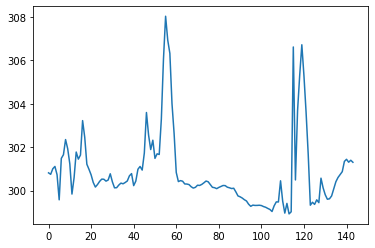

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(tas[0].data)